# Module 5: Data Science with Python

## Task 3: Build and Evaluate Models

### Yoselin Delgado

#### Selecting and Dividing the Data 

# Cleaning and Pre-processing

In [1]:
# Load the Pandas libraries - alias 'pd' 
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from math import sqrt
%matplotlib inline

In [2]:
#estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier as GP
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model

In [3]:
#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [4]:
#cross validation
from sklearn.model_selection import train_test_split

In [5]:
# Uploading the dataset with Pandas
credit = pd.read_csv('C:\\Users\\Admin\\Desktop\\Module 5\\creditcard.csv', header=1, low_memory=False)

In [6]:
#Exploring the DataSet
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
#Exploring the DataSet
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
#Exploring the DataSet
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [9]:
#Cleaning the Data
credit = credit.drop('ID', axis=1)

In [10]:
#Changing types to category
credit['SEX'] = credit['SEX'].astype('category')
credit['EDUCATION'] = credit['EDUCATION'].astype('category')
credit['MARRIAGE'] = credit['MARRIAGE'].astype('category')
credit['PAY_0'] = credit['PAY_0'].astype('category')
credit['PAY_2'] = credit['PAY_2'].astype('category')
credit['PAY_3'] = credit['PAY_3'].astype('category')
credit['PAY_4'] = credit['PAY_4'].astype('category')
credit['PAY_5'] = credit['PAY_5'].astype('category')
credit['PAY_6'] = credit['PAY_6'].astype('category')
credit['default payment next month'] = credit['default payment next month'].astype('category')
credit.rename(columns={"default payment next month":"DEFAULT"}, inplace=True)

In [11]:
credit.dtypes

LIMIT_BAL       int64
SEX          category
EDUCATION    category
MARRIAGE     category
AGE             int64
PAY_0        category
PAY_2        category
PAY_3        category
PAY_4        category
PAY_5        category
PAY_6        category
BILL_AMT1       int64
BILL_AMT2       int64
BILL_AMT3       int64
BILL_AMT4       int64
BILL_AMT5       int64
BILL_AMT6       int64
PAY_AMT1        int64
PAY_AMT2        int64
PAY_AMT3        int64
PAY_AMT4        int64
PAY_AMT5        int64
PAY_AMT6        int64
DEFAULT      category
dtype: object

# Covariance Estimation

In [12]:
##Correlation Matrix
covMat = credit.cov()
print(covMat)

              LIMIT_BAL            AGE     BILL_AMT1     BILL_AMT2  \
LIMIT_BAL  1.683446e+10  173076.722569  2.727020e+09  2.570130e+09   
AGE        1.730767e+05      84.969755  3.817293e+04  3.561366e+04   
BILL_AMT1  2.727020e+09   38172.933546  5.422240e+09  4.986670e+09   
BILL_AMT2  2.570130e+09   35613.657962  4.986670e+09  5.065705e+09   
BILL_AMT3  2.548533e+09   34334.251320  4.556511e+09  4.582086e+09   
BILL_AMT4  2.453926e+09   30453.108180  4.075286e+09  4.086508e+09   
BILL_AMT5  2.331481e+09   27654.067800  3.714795e+09  3.720401e+09   
BILL_AMT6  2.243837e+09   26137.648547  3.519876e+09  3.524868e+09   
PAY_AMT1   4.195711e+08    3992.041735  1.710894e+08  3.305146e+08   
PAY_AMT2   5.333504e+08    4626.861549  1.685692e+08  1.653859e+08   
PAY_AMT3   4.801180e+08    4746.824393  2.034048e+08  1.888731e+08   
PAY_AMT4   4.131202e+08    3087.324192  1.826164e+08  1.643518e+08   
PAY_AMT5   4.305657e+08    3218.052172  1.879091e+08  1.717652e+08   
PAY_AMT6   5.065153e

# Exploration Data Analysis

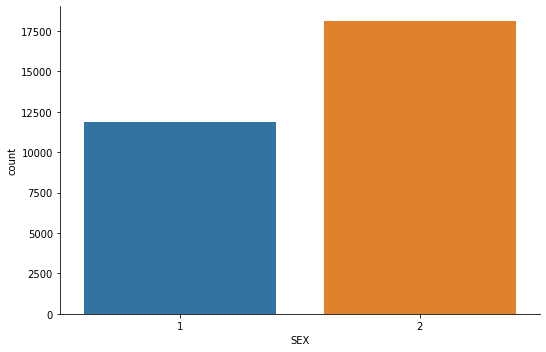

In [13]:
#Group by gender - Gender (1 = male; 2 = female)
credit.groupby('SEX')['SEX'].count()
sns = sns.catplot('SEX', data=credit, kind='count', aspect=1.5)

In [14]:
import pandas as pd
from plotnine import *
from plotnine.data import mtcars

%matplotlib inline

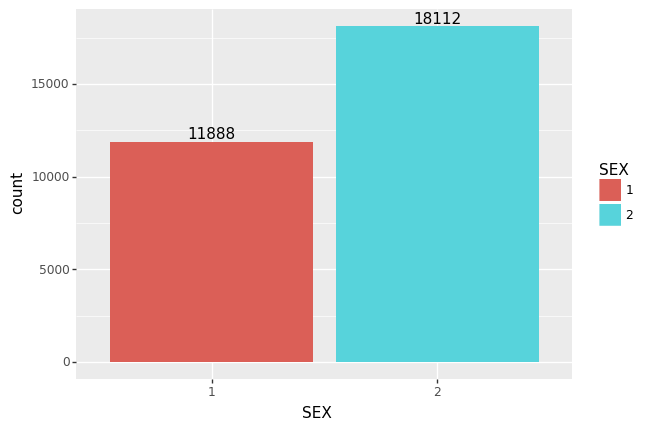

<ggplot: (-9223371949892470208)>

In [15]:
(ggplot(credit, aes('SEX', fill='SEX'))
 + geom_bar()
 + geom_text(
     aes(label='stat(count)'),
     stat='count',
     nudge_y=0.125,
     va='bottom'
 )
)

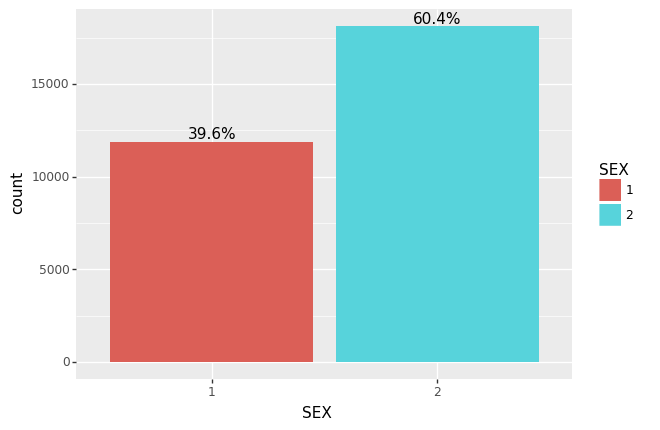

<ggplot: (-9223371949892445200)>

In [16]:
(ggplot(credit, aes('SEX', fill='SEX'))
 + geom_bar()
 + geom_text(
     aes(label='stat(prop)*100', group=1),
     stat='count',
     nudge_y=0.125,
     va='bottom',
     format_string='{:.1f}%'
 )
)

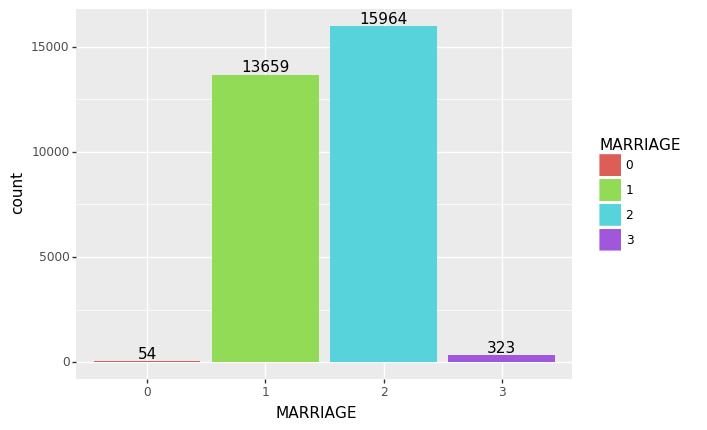

<ggplot: (-9223371949892321356)>

In [17]:
(ggplot(credit, aes('MARRIAGE', fill='MARRIAGE'))
 + geom_bar()
 + geom_text(
     aes(label='stat(count)'),
     stat='count',
     nudge_y=0.125,
     va='bottom'
 )
)

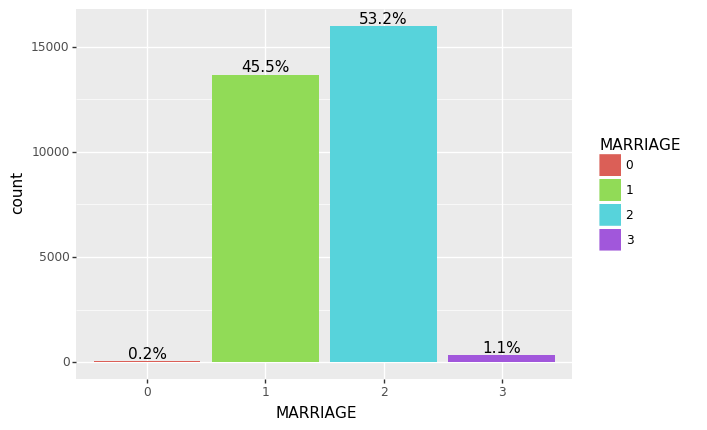

<ggplot: (-9223371949892386476)>

In [18]:
(ggplot(credit, aes('MARRIAGE', fill='MARRIAGE'))
 + geom_bar()
 + geom_text(
     aes(label='stat(prop)*100', group=1),
     stat='count',
     nudge_y=0.125,
     va='bottom',
     format_string='{:.1f}%'
 )
)

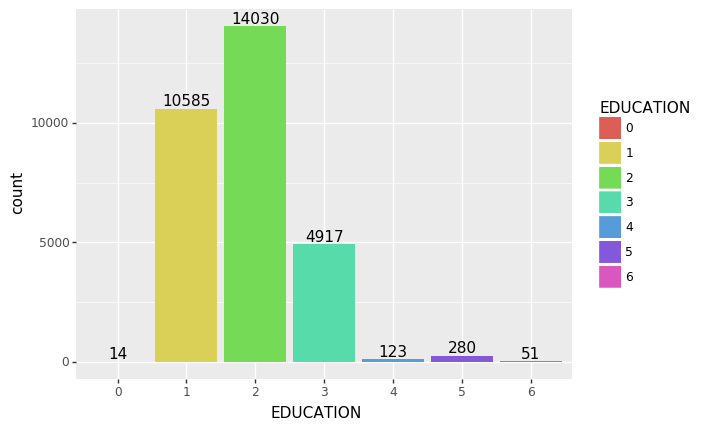

<ggplot: (-9223371949892350608)>

In [19]:
(ggplot(credit, aes('EDUCATION', fill='EDUCATION'))
 + geom_bar()
 + geom_text(
     aes(label='stat(count)'),
     stat='count',
     nudge_y=0.125,
     va='bottom'
 )
)

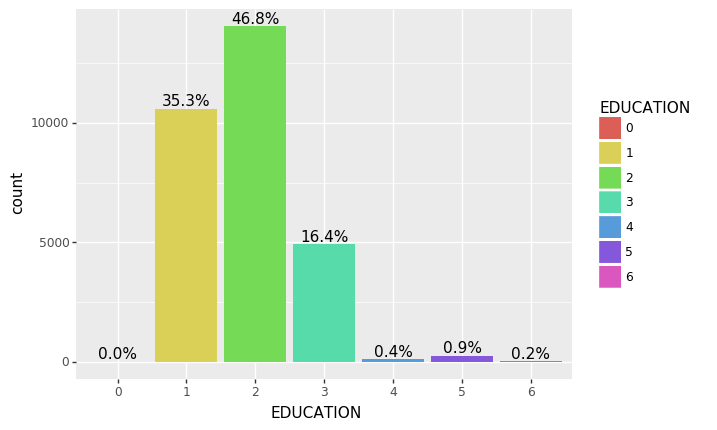

<ggplot: (-9223371949892396708)>

In [20]:
(ggplot(credit, aes('EDUCATION', fill='EDUCATION'))
 + geom_bar()
 + geom_text(
     aes(label='stat(prop)*100', group=1),
     stat='count',
     nudge_y=0.125,
     va='bottom',
     format_string='{:.1f}%'
 )
)

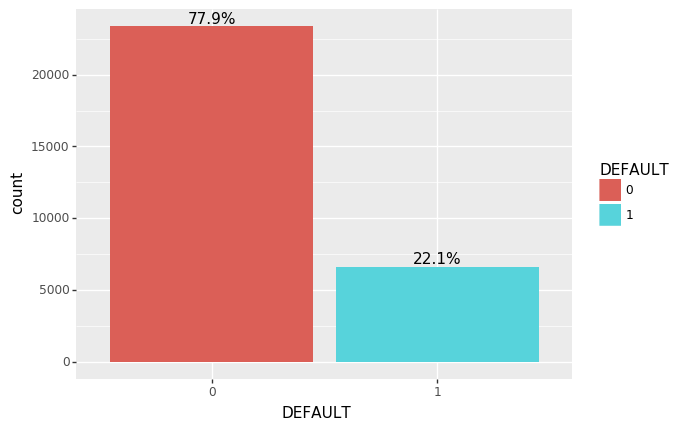

<ggplot: (-9223371949892264984)>

In [21]:
(ggplot(credit, aes('DEFAULT', fill='DEFAULT'))
 + geom_bar()
 + geom_text(
     aes(label='stat(prop)*100', group=1),
     stat='count',
     nudge_y=0.125,
     va='bottom',
     format_string='{:.1f}%'
 )
)

In [22]:
#Data Dimensionality Reduction

In [23]:
credit['AGE'] = credit['AGE'].astype(float)

In [24]:
#add a new column category next to the age group. 
category = pd.cut(credit.AGE,bins=[0,17,65,99],labels=['Child','Adult','Elderly'])
credit.insert(3,'Age_Group',category)

In [25]:
credit.head()

,LIMIT_BAL,SEX,EDUCATION,Age_Group,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,Adult,1,24.0,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,Adult,2,26.0,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,Adult,2,34.0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,Adult,1,37.0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,Adult,1,57.0,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


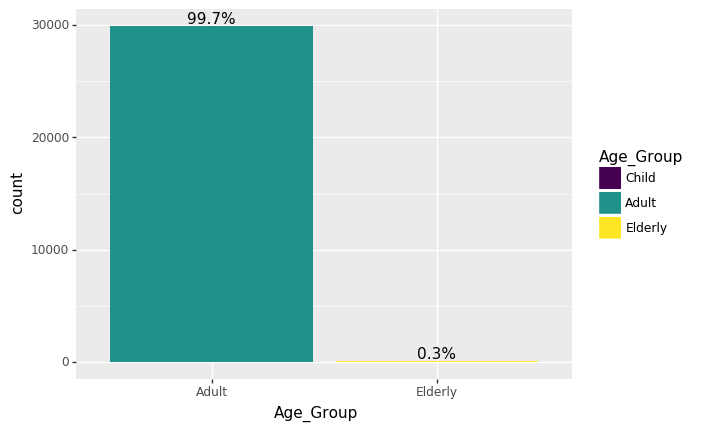

<ggplot: (-9223371949892324680)>

In [26]:
(ggplot(credit, aes('Age_Group', fill='Age_Group'))
 + geom_bar()
 + geom_text(
     aes(label='stat(prop)*100', group=1),
     stat='count',
     nudge_y=0.125,
     va='bottom',
     format_string='{:.1f}%'
 )
)

In [27]:
credit['Age_Group'].unique()

[Adult, Elderly]
Categories (2, object): [Adult < Elderly]

# Feature Engineering (either PCA or RFE) and Dimensionality Reduction

###### Model Initialization

In [28]:
credit = credit.drop('Age_Group', axis=1)

In [29]:
#Models
modelRF = RandomForestClassifier()
modelKNN = KNeighborsClassifier()
modelSVC = SVC()
modelGNB = GP()
modelDT = DecisionTreeClassifier()

In [30]:
#Reduced Feature Elimination (RFE) Variables
modelRF_RFE = RandomForestClassifier()
modelKNC_RFE = KNeighborsClassifier()
modelSVC_RFE = SVC()
modelGNB_RFE = GP()
modelDT_RFE = DecisionTreeClassifier()

In [31]:
#Principal Component Analysis  (PCA) Variables

modelRF_PCA = RandomForestClassifier()
modelKNC_PCA = KNeighborsClassifier()
modelSVC_PCA = SVC()
modelGNB_PCA = GP()
modelDT_PCA = DecisionTreeClassifier()

###### RFE

In [32]:
#Feature selection
features = credit.iloc[:,:-1]
features.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24.0,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26.0,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34.0,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37.0,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57.0,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [33]:
#Dependent Variable
depVar = credit['DEFAULT']
print(depVar)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: DEFAULT, Length: 30000, dtype: category
Categories (2, int64): [0, 1]


In [34]:
#RFE Elimination
credit=credit.iloc[:,:-1]
creditRFE = credit.copy()
dtC= DecisionTreeClassifier(random_state=101)
rfecv=RFECV(estimator=dtC, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(creditRFE, depVar)
print('The number of optimal feaures found is: {}'.format(rfecv.n_features_))

The number of optimal feaures found is: 4


In [35]:
creditRFE.drop(creditRFE.columns[np.where(rfecv.support_==False)[0]],axis=1,inplace=True)

In [36]:
creditRFE.head()

,PAY_0,BILL_AMT1,BILL_AMT2,BILL_AMT6
0,2,3913,3102,0
1,-1,2682,1725,3261
2,0,29239,14027,15549
3,0,46990,48233,29547
4,-1,8617,5670,19131


In [37]:
creditRFE.describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT6
count,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,38871.760400
std,73635.860576,71173.768783,59554.107537
min,-165580.000000,-69777.000000,-339603.000000
25%,3558.750000,2984.750000,1256.000000
50%,22381.500000,21200.000000,17071.000000
75%,67091.000000,64006.250000,49198.250000
max,964511.000000,983931.000000,961664.000000


In [38]:
creditRFE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   PAY_0      30000 non-null  category
 1   BILL_AMT1  30000 non-null  int64   
 2   BILL_AMT2  30000 non-null  int64   
 3   BILL_AMT6  30000 non-null  int64   
dtypes: category(1), int64(3)
memory usage: 732.9 KB


In [39]:
covMatrixRFE=creditRFE.cov()
print(covMatrixRFE)

              BILL_AMT1     BILL_AMT2     BILL_AMT6
BILL_AMT1  5.422240e+09  4.986670e+09  3.519876e+09
BILL_AMT2  4.986670e+09  5.065705e+09  3.524868e+09
BILL_AMT6  3.519876e+09  3.524868e+09  3.546692e+09


In [40]:
corrMatrixRFE=creditRFE.corr()
print(corrMatrixRFE)

           BILL_AMT1  BILL_AMT2  BILL_AMT6
BILL_AMT1   1.000000   0.951484   0.802650
BILL_AMT2   0.951484   1.000000   0.831594
BILL_AMT6   0.802650   0.831594   1.000000


In [41]:
# Partitioning and creating dataset using 75% for training and 25% for testing.
xTrain, xTest, yTrain, yTest = train_test_split(features, depVar)
xTrain.shape, xTest.shape, yTrain.shape, yTest.shape

((22500, 23), (7500, 23), (22500,), (7500,))

In [42]:
xTrainRFE, xTestRFE, yTrainRFE, yTestRFE = train_test_split(creditRFE, depVar)
xTrainRFE.shape, xTestRFE.shape, yTrainRFE.shape, yTestRFE.shape

((22500, 4), (7500, 4), (22500,), (7500,))

In [43]:
xTrainPCA, xTestPCA, yTrainPCA, yTestPCA = train_test_split(credit, depVar)
xTrainPCA.shape, xTestPCA.shape, yTrainPCA.shape, yTestPCA.shape

((22500, 23), (7500, 23), (22500,), (7500,))

###### PCA

In [44]:
standScaler= StandardScaler()
xTrainPCA=standScaler.fit_transform(xTrainPCA)
xTestPCA=standScaler.fit_transform(xTestPCA)
pca=PCA(n_components=7) 
xTrainPCA=pca.fit_transform(xTrainPCA)
xTestPCA=pca.fit_transform(xTestPCA)
explained_variance=pca.explained_variance_ratio_
sum(explained_variance)

0.7416047594236402

In [45]:
xTrain.shape, xTest.shape, yTrain.shape, yTest.shape

((22500, 23), (7500, 23), (22500,), (7500,))

In [46]:
xTrainRFE.shape, xTestRFE.shape, yTrainRFE.shape, yTestRFE.shape

((22500, 4), (7500, 4), (22500,), (7500,))

In [47]:
xTrainPCA.shape, xTestPCA.shape, yTrainPCA.shape, yTestPCA.shape

((22500, 7), (7500, 7), (22500,), (7500,))

# Classification  

## Building the Models and Choosing the Right Model 

### Random Forest -  Model Fitting and Scoring         

In [50]:
#Origninal DataSet

In [49]:
print(cross_val_score(modelRF, xTrain, yTrain)) 
modelRF.score(xTrain,yTrain)

[0.81511111 0.814      0.80711111 0.81755556 0.81644444]


0.9992

In [51]:
# Recursive Feature Eliminitation DataSet

In [52]:
modelRF_RFE.fit(xTrainRFE,yTrainRFE)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
print(cross_val_score(modelRF_RFE, xTrainRFE, yTrainRFE)) 
modelRF_RFE.score(xTrainRFE,yTrainRFE)

[0.80822222 0.80355556 0.79511111 0.80244444 0.80377778]


0.9833333333333333

In [80]:
#Principal Component Analysis DataSet

In [55]:
modelRF_PCA.fit(xTrainPCA,yTrainPCA)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
print(cross_val_score(modelRF_PCA, xTrainPCA, yTrainPCA)) 
modelRF_PCA.score(xTrainPCA,yTrainPCA)

[0.80711111 0.80577778 0.80222222 0.79577778 0.79133333]


0.9993777777777778

## Model Tunning

### Random Forest - #Tunning parameters

In [65]:
## Tuning min_samples_split from 2 to 4 and n_estimators parameters from 10 to 80.
modelRF_Tuned_trees = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
modelRF_Tuned_trees.fit(xTrain,yTrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
print(cross_val_score(modelRF_Tuned_trees, xTrain, yTrain)) 
modelRF_Tuned_trees.score(xTrain,yTrain)

[0.816      0.81511111 0.80622222 0.81466667 0.814     ]


0.9984888888888889

In [69]:
## Tuning min_samples_split from 2 to 4 and n_estimators parameters from 10 to 80.
modelRF_Tuned_trees = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
modelRF_Tuned_trees.fit(xTrain,yTrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
print(cross_val_score(modelRF_Tuned_trees, xTrain, yTrain)) 
modelRF_Tuned_trees.score(xTrain,yTrain)

[0.81666667 0.81866667 0.80822222 0.81333333 0.81266667]


0.9927111111111111

In [86]:
## Tuning min_samples_split from 2 to 4 and n_estimators parameters from 10 to 80.
modelRF_Tuned_trees = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
modelRF_Tuned_trees.fit(xTrain,yTrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [87]:
print(cross_val_score(modelRF_Tuned_trees, xTrain, yTrain)) 
modelRF_Tuned_trees.score(xTrain,yTrain)

[0.81511111 0.81355556 0.80955556 0.81422222 0.81266667]


0.9991111111111111

## *** Result = Selected best model for Random Forest:  PCA with Original DataSet ***

### Decision Tree - Model Fitting and Scoring         

###### Decision Tree - #Original DataSet

In [94]:
modelDT.fit(xTrain, yTrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [95]:
print(cross_val_score(modelDT, xTrain, yTrain)) 
modelDT.score(xTrain,yTrain)

[0.712      0.72555556 0.71377778 0.72533333 0.71733333]


0.9992444444444445

###### Decision Tree - #RFE DataSet

In [138]:
modelDT_RFE.fit(xTrainRFE,yTrainRFE)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [76]:
print(cross_val_score(modelDT_RFE, xTrainRFE,yTrainRFE)) 
modelDT_RFE.score(xTrainRFE, yTrainRFE)

[0.72955556 0.72688889 0.71688889 0.72733333 0.72355556]


0.9834222222222222

###### Decision Tree- #PCA DataSet

In [78]:
modelDT_PCA.fit(xTrainPCA,yTrainPCA)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [79]:
print(cross_val_score(modelDT_PCA, xTrainPCA,yTrainPCA)) 
modelDT_PCA.score(xTrainPCA, yTrainPCA)

[0.72155556 0.70911111 0.71977778 0.72377778 0.71688889]


0.9993777777777778

###### Decision Tree- #Tunning parameters

In [124]:
#@min_samples_split parameter from 2 to 5
modelDT_Tuned_splitter=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='random')

In [126]:
 modelDT_Tuned_splitter.fit(xTrain,yTrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [121]:
print(cross_val_score(modelDT_Tuned_splitter, xTrain, yTrain)) 
modelDT_Tuned_splitter.score(xTrain,yTrain)

[0.73022222 0.738      0.73733333 0.74666667 0.73644444]


0.9480888888888889

## *** Result = Selected best model for Decision Tree:  PCA  DataSet ***

### K-Nearest Neighbor - Model Fitting and Scoring

In [131]:
#KNN - Original DataSet

In [133]:
modelKNN.fit(xTrain,yTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [136]:
print(cross_val_score(modelKNN, xTrain, yTrain)) 
modelKNN.score(xTrain,yTrain)

[0.75688889 0.75155556 0.74977778 0.74577778 0.75288889]


0.8158666666666666

##### Recursive Feature Eliminitation DataSet

In [142]:
modelKNC_RFE.fit(xTrainRFE,yTrainRFE)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [143]:
print(cross_val_score(modelKNC_RFE, xTrainRFE, yTrainRFE)) 
modelKNC_RFE.score(xTrainRFE, yTrainRFE)

[0.75133333 0.74377778 0.74044444 0.74844444 0.75044444]


0.8105777777777777

##### Principal Component Analysis Data Set

In [144]:
modelKNC_PCA.fit(xTrainPCA,yTrainPCA)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [145]:
print(cross_val_score(modelKNC_PCA, xTrainPCA,yTrainPCA)) 
modelKNC_PCA.score(xTrainPCA, yTrainPCA)

[0.78111111 0.786      0.78488889 0.788      0.78288889]


0.8415555555555555

## Model Tunning

#Tuning neighbors from 5 to 2 and p parameter from 2 to 10

In [195]:
modelKNC_Tuned_n=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=5,
                     weights='uniform')

In [196]:
modelKNC_Tuned_n.fit(xTrainPCA,yTrainPCA)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=5,
                     weights='uniform')

In [197]:
print(cross_val_score(modelKNC_Tuned_n, xTrainPCA,yTrainPCA)) 
modelKNC_Tuned_n.score(xTrainPCA, yTrainPCA)

[0.788      0.78577778 0.78       0.77711111 0.77844444]


0.8649333333333333

## *** Result = Selected best model for KNN with tuning neighbors =2 and p=5 with PCA   DataSet ***

# Overall Best Model  =  Random Forest with PCA DataSet 

# Predictions

## Random Forest

In [184]:
predictionsmodelRF_PCA = modelRF_PCA.predict(xTestPCA)
predRsquared = r2_score(yTestPCA,predictionsmodelRF_PCA)
rmse = sqrt(mean_squared_error(yTestPCA, predictionsmodelRF_PCA))
accuracy=accuracy_score(predictionsmodelRF_PCA, yTestPCA)
confusionMatrix=confusion_matrix(predictionsmodelRF_PCA,yTestPCA)

In [185]:
print('Accuracy: %.3f' % accuracy)
print('RMSE: %.3f' % rmse)
print('R Squared: %.3f' % predRsquared)


print('Confusion Matrix: ' + str(confusionMatrix))
print('Confusion Matrix: ' + str(clasificationReport))

Accuracy: 0.777
RMSE: 0.472
R Squared: -0.288
Confusion Matrix: [[5377 1216]
 [ 455  452]]
Confusion Matrix:               precision    recall  f1-score   support

           0       0.71      0.78      0.75      5357
           1       0.29      0.22      0.25      2143

    accuracy                           0.62      7500
   macro avg       0.50      0.50      0.50      7500
weighted avg       0.59      0.62      0.60      7500



## Decision Tree

In [186]:
predictions_modelDT_PCA = modelDT_PCA.predict(xTestPCA)
predRsquared = r2_score(yTestPCA,predictions_modelDT_PCA)
rmse = sqrt(mean_squared_error(yTestPCA, predictions_modelDT_PCA))
accuracy=accuracy_score(predictions_modelDT_PCA, yTestPCA)
confusionMatrix=confusion_matrix(predictions_modelDT_PCA,yTestPCA)
clasificationReport=classification_report(predictions_modelDT_PCA,yTestPCA)

In [187]:
print('Accuracy: %.3f' % accuracy)
print('RMSE: %.3f' % rmse)
print('R Squared: %.3f' % predRsquared)


print('Confusion Matrix: ' + str(confusionMatrix))
print('Confusion Matrix: ' + str(clasificationReport))

Accuracy: 0.657
RMSE: 0.585
R Squared: -0.982
Confusion Matrix: [[4309 1048]
 [1523  620]]
Confusion Matrix:               precision    recall  f1-score   support

           0       0.74      0.80      0.77      5357
           1       0.37      0.29      0.33      2143

    accuracy                           0.66      7500
   macro avg       0.56      0.55      0.55      7500
weighted avg       0.63      0.66      0.64      7500



## KNN

In [201]:
predictions_modelKNC_Tuned_n = modelKNC_Tuned_n.predict(xTrainPCA)
predRsquared = r2_score(yTrainPCA,predictions_modelKNC_Tuned_n)
mse = sqrt(mean_squared_error(yTrainPCA, predictions_modelKNC_Tuned_n))
accuracy=accuracy_score(predictions_modelKNC_Tuned_n, yTrainPCA)
confusionMatrix=confusion_matrix(predictions_modelKNC_Tuned_n,yTrainPCA)
clasificationReport=classification_report(predictions_modelKNC_Tuned_n,yTrainPCA)

In [202]:
print('Accuracy: %.3f' % accuracy)
print('RMSE: %.3f' % rmse)
print('R Squared: %.3f' % predRsquared)


print('Confusion Matrix: ' + str(confusionMatrix))
print('Confusion Matrix: ' + str(clasificationReport))

Accuracy: 0.865
RMSE: 0.585
R Squared: 0.215
Confusion Matrix: [[17532  3039]
 [    0  1929]]
Confusion Matrix:               precision    recall  f1-score   support

           0       1.00      0.85      0.92     20571
           1       0.39      1.00      0.56      1929

    accuracy                           0.86     22500
   macro avg       0.69      0.93      0.74     22500
weighted avg       0.95      0.86      0.89     22500



# Choosing KNN based on accuracy 86%

Classification Accuracy is the simplest out of all the methods of evaluating the accuracy, and the most commonly used. Classification accuracy is simply the number of correct predictions divided by all predictions or a ratio of correct predictions to total predictions.

# Plotting Results

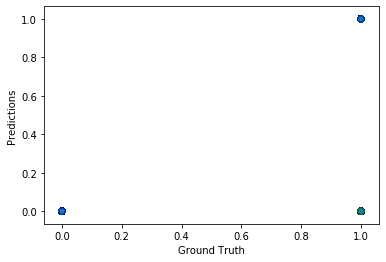

In [214]:
plt.scatter(yTrainPCA, predictions_modelKNC_Tuned_n, edgecolor=['blue','green'], alpha=0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();